# HR Analytics Project- Understanding the Attrition in HR

### Problem Statement:

Every year a lot of companies hire a number of employees. The companies invest time and money in training those employees, not just this but there are training programs within the companies for their existing employees as well. The aim of these programs is to increase the effectiveness of their employees. But where HR Analytics fit in this? and is it just about improving the performance of employees?

### HR Analytics

Human resource analytics (HR analytics) is an area in the field of analytics that refers to applying analytic processes to the human resource department of an organization in the hope of improving employee performance and therefore getting a better return on investment. HR analytics does not just deal with gathering data on employee efficiency. Instead, it aims to provide insight into each process by gathering data and then using it to make relevant decisions about how to improve these processes.

### Attrition in HR

Attrition in human resources refers to the gradual loss of employees overtime. In general, relatively high attrition is problematic for companies. HR professionals often assume a leadership role in designing company compensation programs, work culture, and motivation systems that help the organization retain top employees.

How does Attrition affect companies? and how does HR Analytics help in analyzing attrition? We will discuss the first question here and for the second question, we will write the code and try to understand the process step by step.

### Attrition affecting Companies

A major problem in high employee attrition is its cost to an organization. Job postings, hiring processes, paperwork, and new hire training are some of the common expenses of losing employees and replacing them. Additionally, regular employee turnover prohibits your organization from increasing its collective knowledge base and experience over time. This is especially concerning if your business is customer-facing, as customers often prefer to interact with familiar people. Errors and issues are more likely if you constantly have new workers.

 

##### Note: You can find the dataset in the link below.

Downlaod Files:
https://github.com/dsrscientist/IBM_HR_Attrition_Rate_Analytics

### How does HR Analytics help in analyzing attrition?
The main Business problem that is being solved here is how can a system be created to help big companies control their attrition by understanding which employee could leave so as to provide him/her some incentives to stay back.

# Importing Libraries

In [1]:
pip install missingno

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import missingno as msno

In [3]:
# preprocess.
from sklearn.preprocessing import MinMaxScaler,StandardScaler,LabelEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer


In [4]:
#import the necessary modelling algos.
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB


In [5]:
# model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV

In [6]:
from imblearn.over_sampling import SMOTE


In [7]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

#configure
%matplotlib inline  

# Data Collection and Information

In [8]:
#read the dataset
df=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


All total we have 34 features consisting of both the categorical as well as the numerical features. The target variable is the 'Attrition' of the employee which can be either a Yes or a No.

#### Hence this is a Binary Classification problem.

In [9]:
#no. of rows and coloumns
df.shape

(1470, 35)

Dataset has 1470 rows and 35 coloumns.

# Exploratory Data Analysis

In [10]:
#dataset information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

1.Seems like there are no null values.

2.Also, some columns have object datatype which means we have to encode.

In [11]:
# check for null values
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

### There are no null or missing values in data set

In [12]:
# check the stats
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


### Let us take a look at the columns to select and drop any unwanted columsn like ID

In [13]:
df.columns
df.drop(['EmployeeNumber'],axis = 1,inplace = True)
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [14]:
# check for duplicate data
df.duplicated().sum()

0

### No duplicate data found.

In [15]:
# check the value count in target column
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

Data is imbalanced by class we have 1233 people who have not left the company and 237 people who have left the company

# Data Visualization
### Univariate Analysis

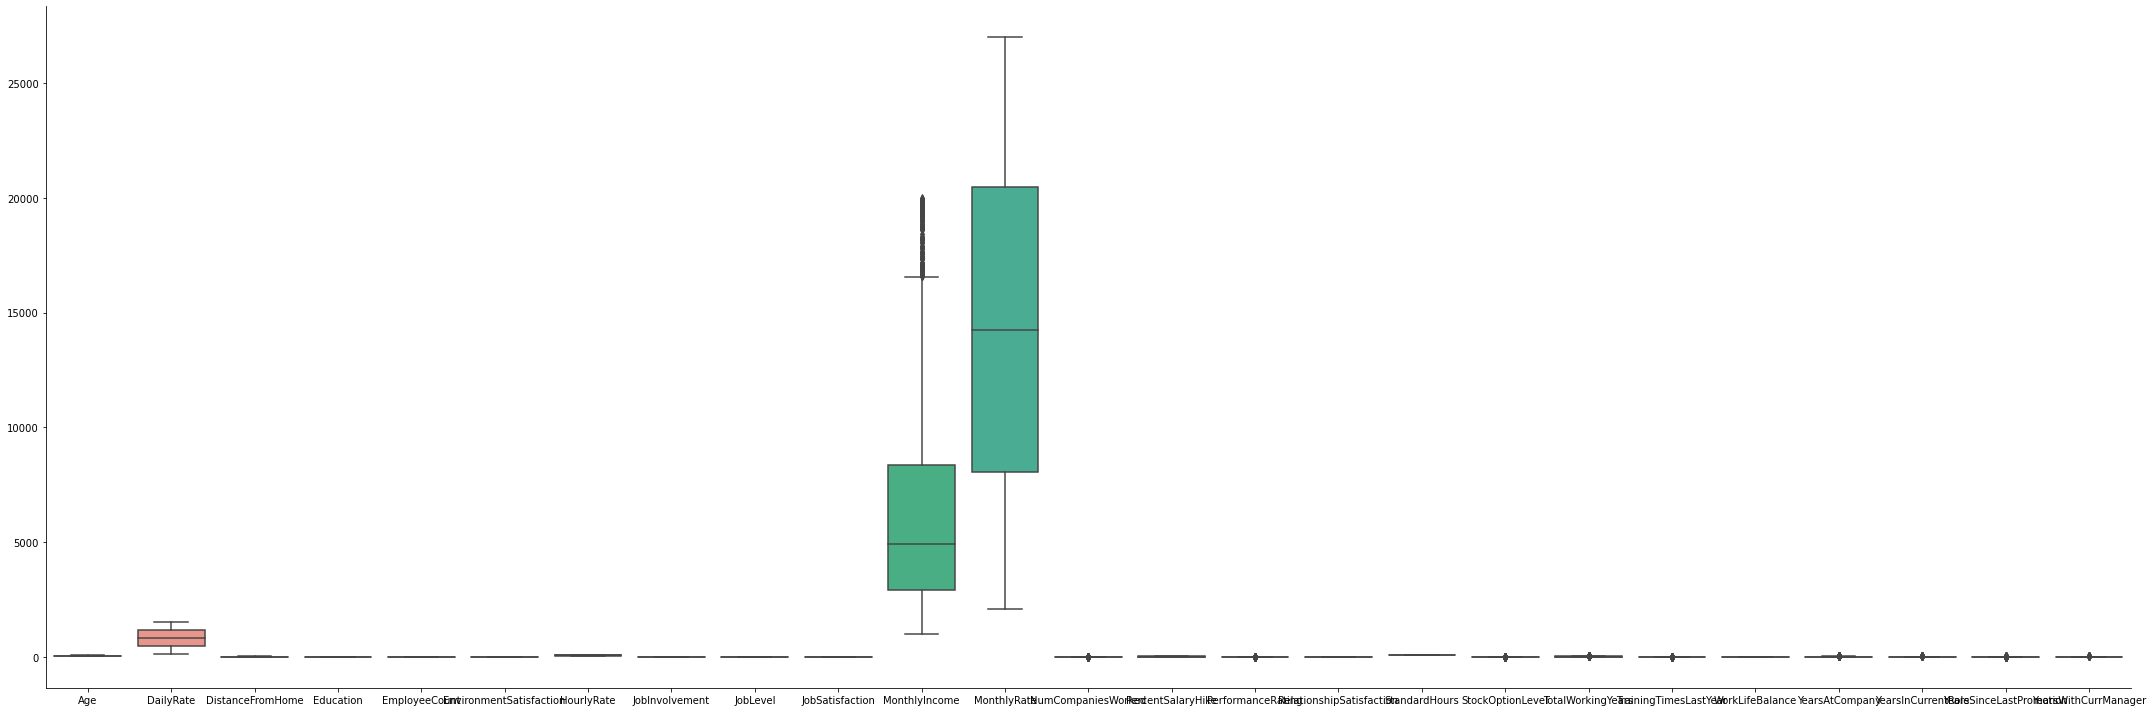

In [16]:
# analyze numeric features

sns.factorplot(data=df,kind='box',size=10,aspect=3)

Note that all the features have pretty different scales and so plotting a boxplot is not a good idea. Instead what we can do is plot histograms of various continuously distributed features.

<AxesSubplot:xlabel='Age', ylabel='Density'>

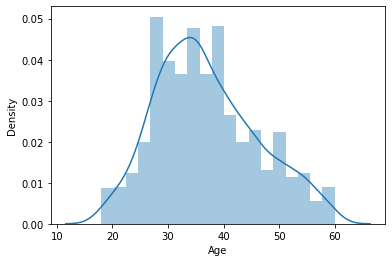

In [17]:
sns.distplot(df['Age'])

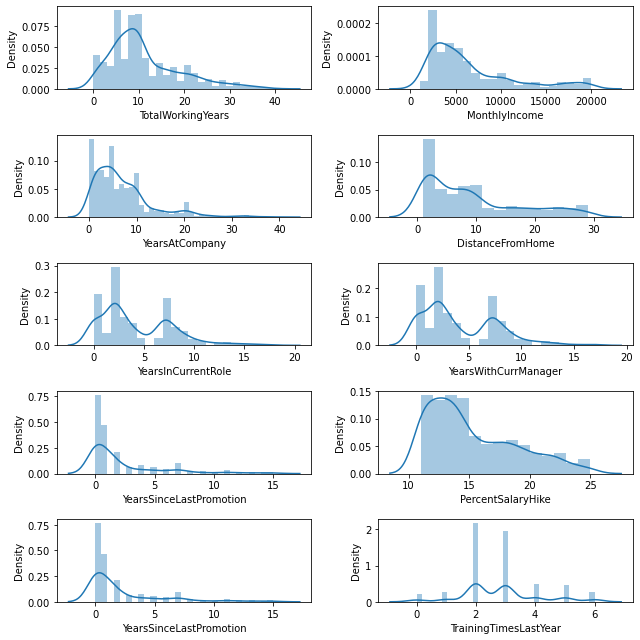

In [18]:
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

fig,ax = plt.subplots(5,2, figsize=(9,9))                
sns.distplot(df['TotalWorkingYears'], ax = ax[0,0]) 
sns.distplot(df['MonthlyIncome'], ax = ax[0,1]) 
sns.distplot(df['YearsAtCompany'], ax = ax[1,0]) 
sns.distplot(df['DistanceFromHome'], ax = ax[1,1]) 
sns.distplot(df['YearsInCurrentRole'], ax = ax[2,0]) 
sns.distplot(df['YearsWithCurrManager'], ax = ax[2,1]) 
sns.distplot(df['YearsSinceLastPromotion'], ax = ax[3,0]) 
sns.distplot(df['PercentSalaryHike'], ax = ax[3,1]) 
sns.distplot(df['YearsSinceLastPromotion'], ax = ax[4,0]) 
sns.distplot(df['TrainingTimesLastYear'], ax = ax[4,1]) 
plt.tight_layout()
plt.show()

### Univariate Categorical Analysis

In [19]:
# categorical features

cat_df=df.select_dtypes(include='object')

cat_df.columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'Over18', 'OverTime'],
      dtype='object')

In [20]:
# function that accepts the name of the column or attribute which we want to analyze.
# The function then plots the countplot for that feature which makes it easier to visualize.

def plot_ca(attr,labels=None):
    if(attr=='JobRole'):
        sns.factorplot(data=df,kind='count',size=5,aspect=3,x=attr)
        return
    
    sns.factorplot(data=df,kind='count',size=5,aspect=1.5,x=attr)

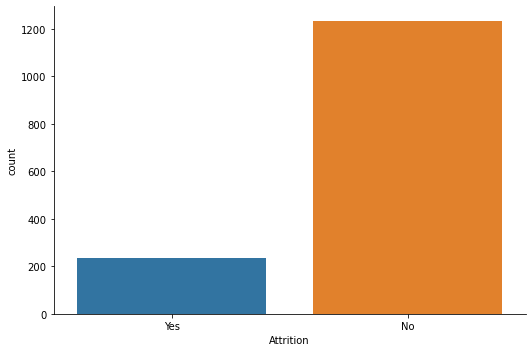

In [21]:
plot_ca('Attrition')

We can observe that the number of observations belonging to the 'No' category is way greater than that belonging to 'Yes' category, hence, target column is skewed and this is a typical example of the 'Imbalanced Classification Problem'. To handle such types of problems we need to use the over-sampling or under-sampling techniques. We'll do that after the Visualization of other features.

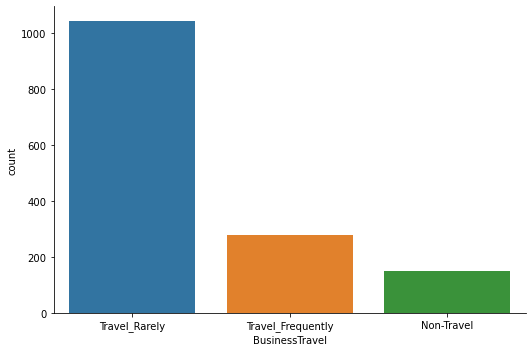

In [22]:
plot_ca('BusinessTravel')

The plot above clearly shows that most people belong to the "Travel_Rarely" class. This indicates that most people did not have jobs that required them to travel frequently.

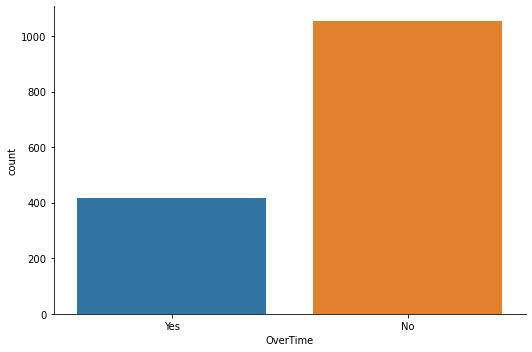

In [23]:
plot_ca('OverTime')

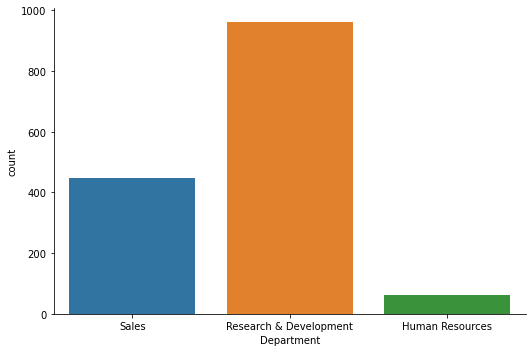

In [24]:
plot_ca('Department')

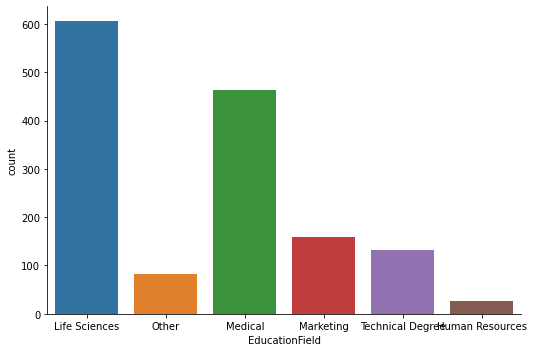

In [25]:
plot_ca('EducationField')

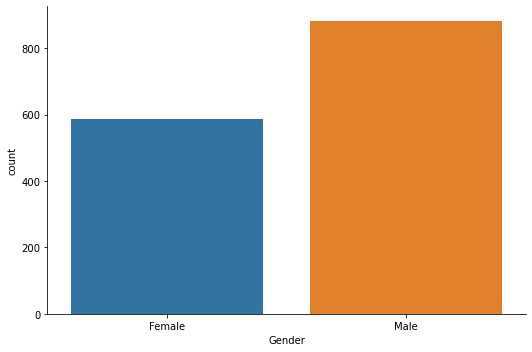

In [26]:
plot_ca('Gender')

We can observe that, males are presnt in higher number.

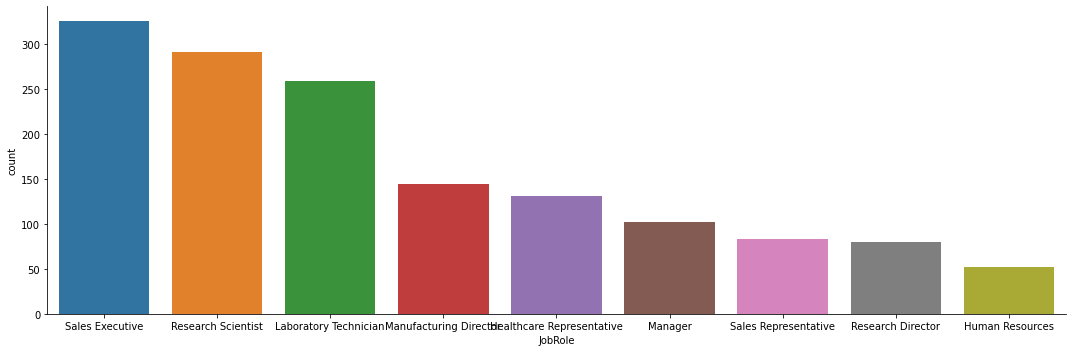

In [27]:
plot_ca('JobRole')

Most of the Employees had "Sales Executive" job role.
### Univariate Numerical Category Analysis

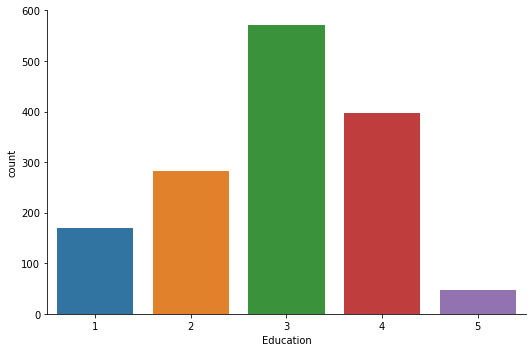

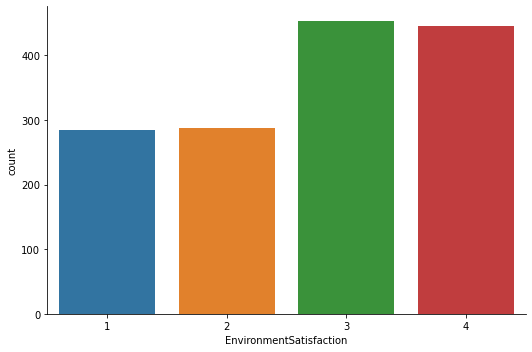

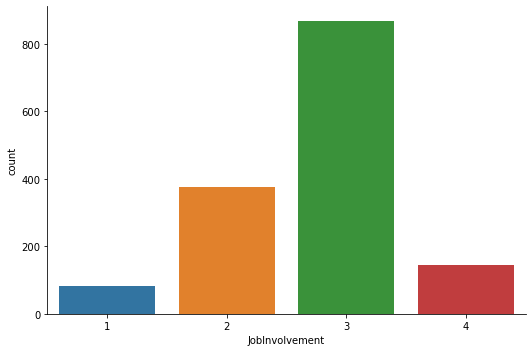

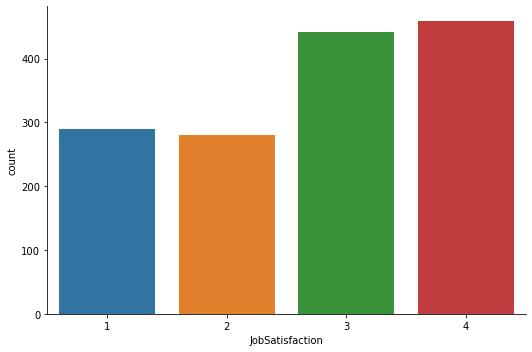

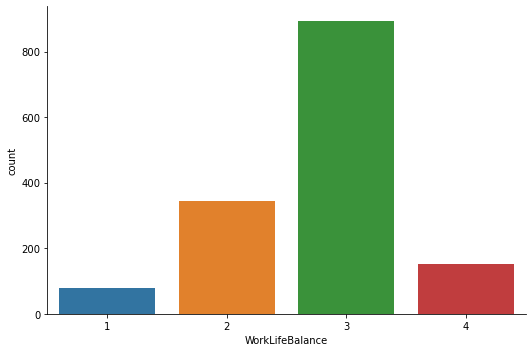

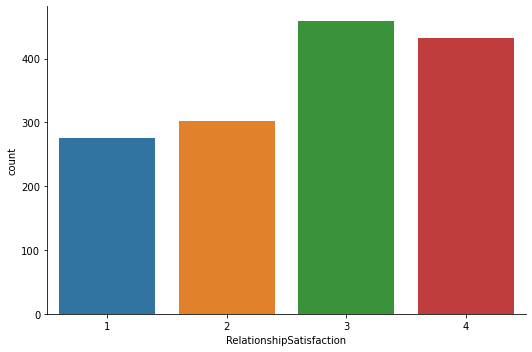

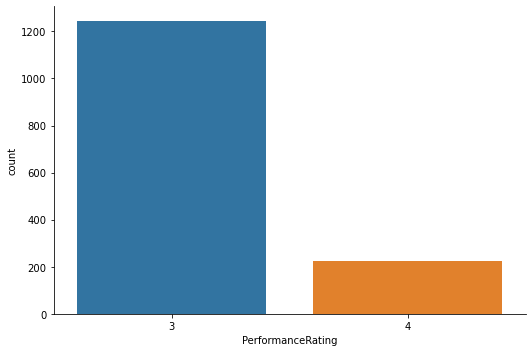

In [28]:
num_disc=['Education','EnvironmentSatisfaction','JobInvolvement','JobSatisfaction','WorkLifeBalance','RelationshipSatisfaction','PerformanceRating']
for i in num_disc:
    plot_ca(i)

# Corelation b/w Features

<AxesSubplot:>

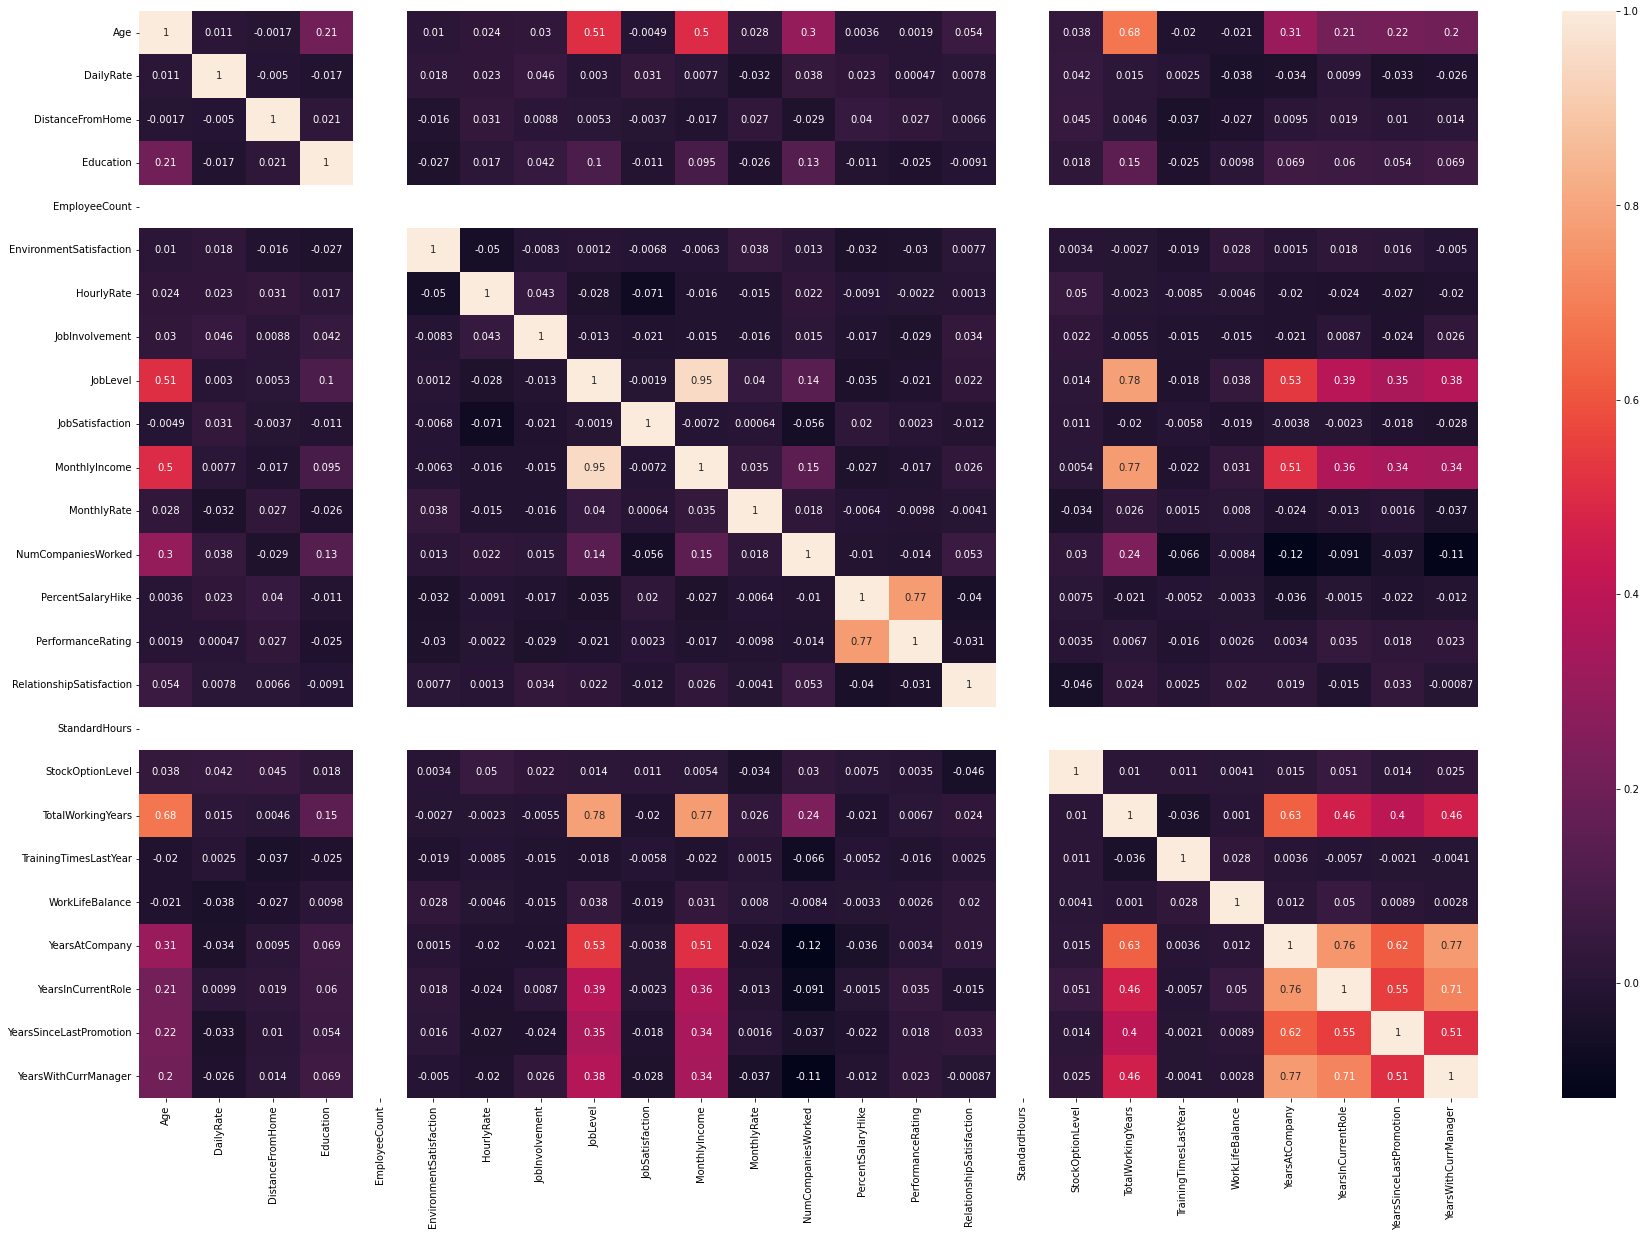

In [29]:
#corelation matrix.
cor_mat= df.corr()
plt.figure(figsize=(30,20))
sns.heatmap(data=cor_mat,annot=True)

### Inferences:
1."JobLevel" is highly related to Age as expected as aged employees will generally tend to occupy higher positions in the company.

2."MonthlyIncome" is very strongly related to joblevel as expected as senior employees will definately earn more.

3."PerformanceRating" is highly related to PercentSalaryHike which is quite obvious.

4.Also note that "TotalWorkingYears" is highly related to JobLevel which is expected as senior employees must have worked for a larger span of time.

5."YearsWithCurrManager" is highly related to "YearsAtCompany".

6."YearsAtCompany" is related to "YearsInCurrentRole".

### Note: 
that we can drop some highly corelated features as they add redundancy to the model but since the corelation is very less in genral let us keep all the features for now. In case of highly corelated features we can use something like Principal Component Analysis(PCA) to reduce our feature space.

### Plotting the Features against the 'Target' variable.
### Age

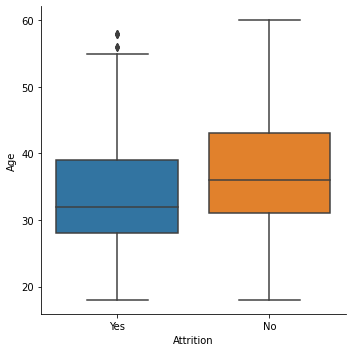

In [30]:
# Age is a continuous quantity and therefore we can plot it against the Attrition using a boxplot.

sns.factorplot(data=df,y='Age',x='Attrition',size=5,aspect=1,kind='box')

We can observe that the median as well the maximum age of the peole with 'No' attrition is higher than that of the 'Yes' category. This shows that peole with higher age have lesser tendency to leave the organisation which makes sense as they may have settled in the organisation.

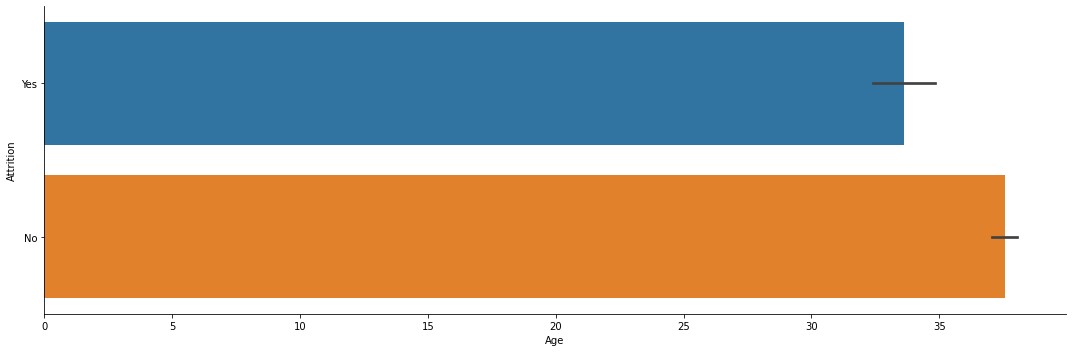

In [31]:
sns.factorplot(x = 'Age', y='Attrition', kind = 'bar', data=df, aspect = 3)

Younger people have a higher rate of attrition compared to older people.
### Department

In [32]:
# Both Attrition(Target) as well as the Deaprtment are categorical. 
# In such cases a cross-tabulation is the most reasonable way to analyze the trends; 
# which shows clearly the number of observations for each class which makes it easier to analyze the results

df.Department.value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

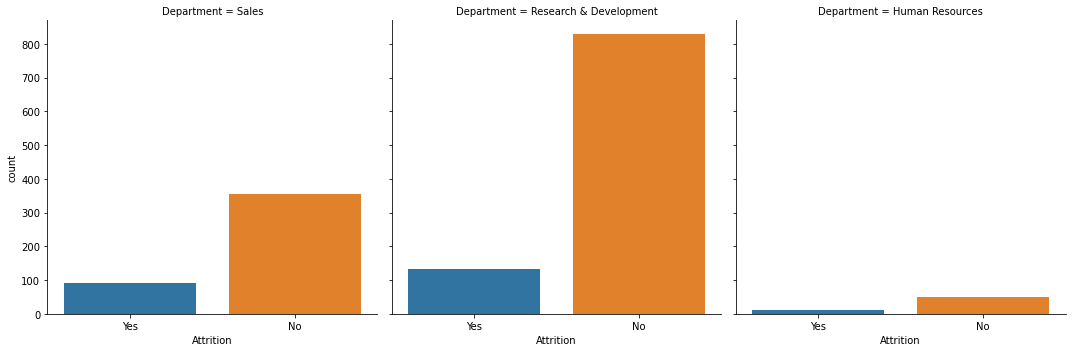

In [33]:
sns.factorplot(data=df,kind='count',x='Attrition',col='Department')

In [34]:
pd.crosstab(columns=[df.Attrition],index=[df.Department],margins=True,normalize='index') # set normalize=index to view rowwise %.

Attrition,No,Yes
Department,,
Human Resources,0.809524,0.190476
Research & Development,0.861602,0.138398
Sales,0.793722,0.206278
All,0.838776,0.161224


Most of the observations corresspond to 'No' as we saw before , also about 81% of the people in HR do not want to leave the organisation and only 19% want to leave. Similarly, 13% of the people in R&D and 20% of the peoplr in Sales want to leave.
### Gender

In [35]:
pd.crosstab(columns=[df.Attrition],index=[df.Gender],margins = True, normalize = 'index')

Attrition,No,Yes
Gender,,
Female,0.852041,0.147959
Male,0.829932,0.170068
All,0.838776,0.161224


About 83% of Males want to stay in the organisation while only 17% want to leave the organisation. All in all 83% of employees want to be in the organisation with only being 16% wanting to leave the organisation or the company.

### Job level

In [38]:
pd.crosstab(columns = [df.Attrition],index =[df.JobLevel],margins=True,normalize='index')

Attrition,No,Yes
JobLevel,,
1,0.736648,0.263352
2,0.902622,0.097378
3,0.853211,0.146789
4,0.952830,0.047170
5,0.927536,0.072464
All,0.838776,0.161224


People in Joblevel 4 have a very high percent for a 'No' and a low percent for a 'Yes', also people in Joblevel 1 has the least tendency to stay.

### Monthly Income

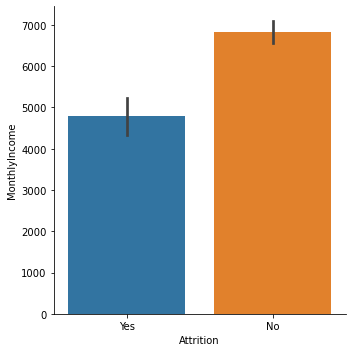

In [39]:
sns.factorplot(data=df,kind='bar',x='Attrition',y='MonthlyIncome')

The average income for 'No' class is quite higher and it is obvious as those earning well will certainly not be willing to exit the organisation. Similarly those employees who are probably not earning well will certainly want to change the company.
### Job Satisfaction

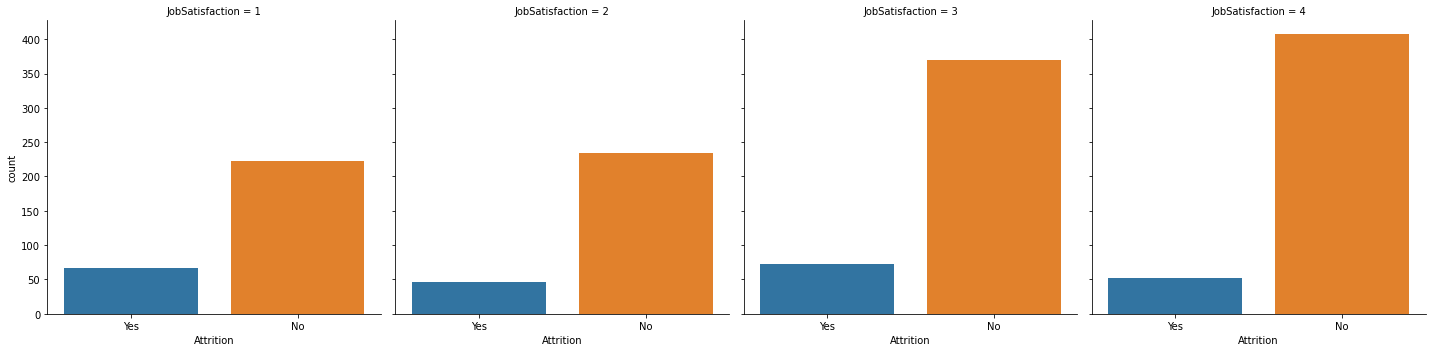

In [40]:
sns.factorplot(data=df,kind='count',x='Attrition',col='JobSatisfaction')

In [41]:
pd.crosstab(columns=[df.Attrition],index=[df.JobSatisfaction],margins=True,normalize='index') # set normalize=index to view rowwise %.

Attrition,No,Yes
JobSatisfaction,,
1,0.771626,0.228374
2,0.835714,0.164286
3,0.834842,0.165158
4,0.886710,0.113290
All,0.838776,0.161224


This indicates an interesting trend. Note that for higher values of job satisfaction (i.e. a person is more satisfied with their job) a lower percentage of them say 'yes' which is quite clear because highly satisfied workers will avoid their unwillingness to leave the organisation.
### Environment Satisfaction

In [42]:
pd.crosstab(columns=[df.Attrition],index=[df.EnvironmentSatisfaction],margins=True,normalize='index') # set normalize=index to view rowwise %.

Attrition,No,Yes
EnvironmentSatisfaction,,
1,0.746479,0.253521
2,0.850174,0.149826
3,0.863135,0.136865
4,0.865471,0.134529
All,0.838776,0.161224


Again we can note that the relative percentage of 'No' in people with a higher degree of environmental satisfaction.
### Work Life Balance

In [43]:
pd.crosstab(columns=[df.Attrition],index=[df.WorkLifeBalance],margins=True,normalize='index') # set normalize=index to view rowwise %.

Attrition,No,Yes
WorkLifeBalance,,
1,0.687500,0.312500
2,0.831395,0.168605
3,0.857783,0.142217
4,0.823529,0.176471
All,0.838776,0.161224


We noticed a similar trend, as people with a better work-life balance do not want to leave the organization.
### RelationshipSatisfaction

In [44]:
pd.crosstab(columns=[df.Attrition],index=[df.RelationshipSatisfaction],margins=True,normalize='index') # set normalize=index to view rowwise %.

Attrition,No,Yes
RelationshipSatisfaction,,
1,0.793478,0.206522
2,0.851485,0.148515
3,0.845316,0.154684
4,0.851852,0.148148
All,0.838776,0.161224


# EDA Concluding Remarks
1.The data is unbalanced by class, we have 83% who did not leave the company and 17% who left the company

2.The age group of IBM employees in this data set is between 25-45 years old

3.Attrition is more common in younger age groups and is more likely among females As expected, it is more common among single employees

4.People who leave the company have fewer opportunities to travel around the company.

5.People with very high education tend to have lower friction
### From the visualization plots we can conclude that below mentioned category are having higher attrition rate:
1.Sales department among all the departments

2.Human Resources and Technical Degree in Education

3.Single’s in Marital status (Will not use this due to GDPR)

4.Male in comparison to females in Gender (Will not use this due to GDPR)

5.Employee with job satisfaction value 1

6.Job level 1 in job level

7.Life balance having value 1

8.Employee staying at distant place

9.Environment Satisfaction value 1
# Pre Processing Pipeline
### Feature Selection

In [45]:
# The feature Selection is one of the main steps of the preprocessing phase as the features which we choose directly effects the model performance. While some of the features seem to be less useful in terms of the context; others seem to equally useful.
# The better features we use the better our model will perform.

df.drop(['BusinessTravel','DailyRate','EmployeeCount','HourlyRate','MonthlyRate'
          ,'NumCompaniesWorked','Over18','StandardHours', 'StockOptionLevel','TrainingTimesLastYear'],axis=1,inplace=True)

### Feature Encoding

In [46]:
def transform(feature):
    le=LabelEncoder()
    df[feature]=le.fit_transform(df[feature])
    print(le.classes_)

In [47]:
cat_df=df.select_dtypes(include='object')
cat_df.columns

Index(['Attrition', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus', 'OverTime'],
      dtype='object')

In [48]:
for col in cat_df.columns:
    transform(col)

['No' 'Yes']
['Human Resources' 'Research & Development' 'Sales']
['Human Resources' 'Life Sciences' 'Marketing' 'Medical' 'Other'
 'Technical Degree']
['Female' 'Male']
['Healthcare Representative' 'Human Resources' 'Laboratory Technician'
 'Manager' 'Manufacturing Director' 'Research Director'
 'Research Scientist' 'Sales Executive' 'Sales Representative']
['Divorced' 'Married' 'Single']
['No' 'Yes']


In [49]:
df.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,JobInvolvement,JobLevel,...,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,TotalWorkingYears,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1,2,1,2,0,3,2,...,1,11,3,1,8,1,6,4,0,5
1,49,0,1,8,1,1,3,1,2,2,...,0,23,4,4,10,3,10,7,1,7
2,37,1,1,2,2,4,4,1,2,1,...,1,15,3,2,7,3,0,0,0,0
3,33,0,1,3,4,1,4,0,3,1,...,1,11,3,3,8,3,8,7,3,0
4,27,0,1,2,1,3,1,1,3,1,...,0,12,3,4,6,3,2,2,2,2


Encoding done.

### Feature Scaling

In [50]:
scaler=StandardScaler()
scaled_df=scaler.fit_transform(df.drop('Attrition',axis=1))
X=scaled_df
Y=df['Attrition']

In [51]:
# Splitting the data into training and test sets

x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

# Building Machine Learning Models
### Handling the Imbalanced dataset
Note that we have an unbalanced dataset with most observations of one type ("NO") in our case. In this dataset, for example, we have about 84% of the observations with "No" and only 16% with "Yes" and therefore this is an imbalanced dataset.
#### Let's deal the imbalanced dataset, Either Oversampling the Minority or Undersampling the Majority Class, but, in our case the number of observations is already pretty low and so oversampling will be more appropriate.

In [55]:
from imblearn.over_sampling import SMOTE

In [56]:
# Oversampleing using SMOTE Techniques
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [57]:
Y.value_counts()

1    1233
0    1233
Name: Attrition, dtype: int64

### Standard Scaling

In [58]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

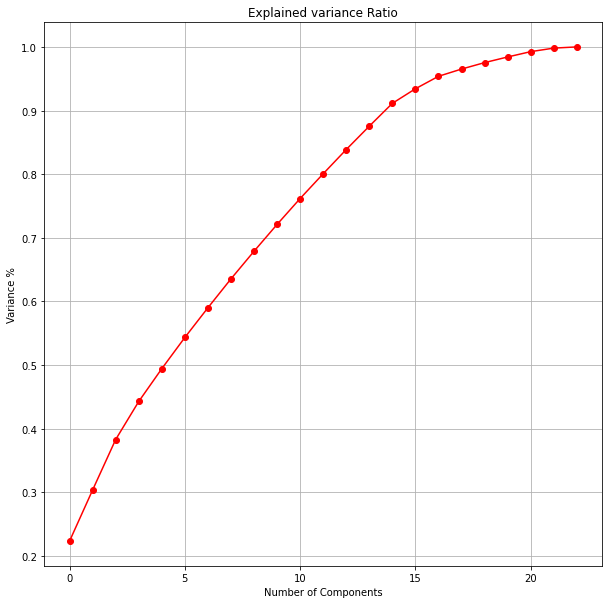

In [59]:
from sklearn.decomposition import PCA
pca = PCA()
#plot the graph to find the principal components
x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

### Comment -
AS per the graph, we can see that 21 principal components attribute for 90% of variation in the data. We shall pick the first 21 components for our prediction

In [60]:
pca_new = PCA(n_components=21)
x_new = pca_new.fit_transform(X_scale)

In [61]:
principle_x=pd.DataFrame(x_new,columns=np.arange(21))

In [62]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=42, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (1652, 21)
Training target vector size: (1652,)
Test feature matrix size: (814, 21)
Test target vector size: (814,)


### Finding best Random state

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(principle_x,Y,test_size = 0.33, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.7960687960687961 on Random_state 157


In [66]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=242, test_size=.33)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.7457002457002457


Confusion matrix of Logistics Regression : 
 [[272 123]
 [ 84 335]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.76      0.69      0.72       395
           1       0.73      0.80      0.76       419

    accuracy                           0.75       814
   macro avg       0.75      0.74      0.74       814
weighted avg       0.75      0.75      0.74       814



### Finding Optimal value of n_neighbors for KNN

In [67]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(30):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.34520228731081604
RMSE value for k=  2 is: 0.3095530581711249
RMSE value for k=  3 is: 0.3996312796881141
RMSE value for k=  4 is: 0.3659325537672672
RMSE value for k=  5 is: 0.42495844572108527
RMSE value for k=  6 is: 0.4057328734760897
RMSE value for k=  7 is: 0.44611343738694875
RMSE value for k=  8 is: 0.42059978233966894
RMSE value for k=  9 is: 0.4623410145760527
RMSE value for k=  10 is: 0.4474882124097798
RMSE value for k=  11 is: 0.47285010689141604
RMSE value for k=  12 is: 0.4623410145760527
RMSE value for k=  13 is: 0.48313065874071104
RMSE value for k=  14 is: 0.47414736613812886
RMSE value for k=  15 is: 0.49691925594481334
RMSE value for k=  16 is: 0.48566679510981176
RMSE value for k=  17 is: 0.49444084021422063
RMSE value for k=  18 is: 0.4869299098440525
RMSE value for k=  19 is: 0.4956815970966097
RMSE value for k=  20 is: 0.48566679510981176
RMSE value for k=  21 is: 0.4919499385249906
RMSE value for k=  22 is: 0.48313065874071104
RMSE va

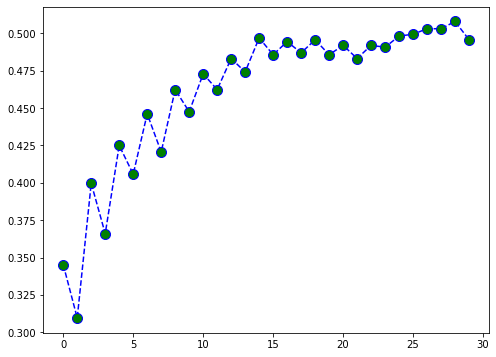

In [68]:
#plotting the rmse values against k values -
plt.figure(figsize = (8,6))
plt.plot(range(30), rmse_val, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)

### Comment-
At k= 2, we get the minimum RMSE value which approximately 0.30032661958503204, and shoots up on further increasing the k value. We can safely say that k=2 will give us the best result in this case

# Applying other classification algorithm

In [69]:
model=[
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 22),
        RandomForestClassifier(),
        AdaBoostClassifier(),
        GradientBoostingClassifier(),
        BaggingClassifier()]

for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    print('============================================================================================================')

Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.8574938574938575


Confusion matrix : 
 [[323  72]
 [ 44 375]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.88      0.82      0.85       395
           1       0.84      0.89      0.87       419

    accuracy                           0.86       814
   macro avg       0.86      0.86      0.86       814
weighted avg       0.86      0.86      0.86       814



Classification ML Algorithm Evaluation Matrix GaussianNB() is


Accuracy Score :
 0.7764127764127764


Confusion matrix : 
 [[281 114]
 [ 68 351]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.81      0.71      0.76       395
           1       0.75      0.84      0.79       419

    accuracy                           0.78       814
   macro avg       0.78      0.77      0.77       814
weighted avg       0.78      0.78      0.78       814




We can see that RandomForestClassifier() gives us good Accuracy and maximum f1 score. so we will continue further investigation with crossvalidation of above model

# CrossValidation :

In [70]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 12),
        RandomForestClassifier(),
        AdaBoostClassifier(),
        GradientBoostingClassifier(),
        BaggingClassifier()]

for m in model:
    score = cross_val_score(m, X, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')



Cross Validation Score LogisticRegression() :

Score : [0.76720648 0.76876268 0.79310345 0.73833671 0.75659229]
Mean Score : 0.7648003219157271
Std deviation : 0.0178339625826333




Cross Validation Score SVC() :

Score : [0.87246964 0.89452333 0.90263692 0.86815416 0.88843813]
Mean Score : 0.8852444342248974
Std deviation : 0.013069575550139012




Cross Validation Score GaussianNB() :

Score : [0.66396761 0.67951318 0.67545639 0.67342799 0.67748479]
Mean Score : 0.6739699928554418
Std deviation : 0.005396879255680772




Cross Validation Score DecisionTreeClassifier() :

Score : [0.71862348 0.90466531 0.88640974 0.90060852 0.9148073 ]
Mean Score : 0.865022870798466
Std deviation : 0.07376520920590006




Cross Validation Score KNeighborsClassifier(n_neighbors=12) :

Score : [0.77732794 0.83772819 0.85192698 0.82150101 0.82758621]
Mean Score : 0.8232140657463599
Std deviation : 0.025150261988568536




Cross Validation Score RandomForestClassifier() :

Score : [0.74898785 0.9716024

On basis of maximum score in crossvalidation of Random Forest Classifier. we will apply Hyperparameter tuning on Random Forest model

# Hyper Parameter Tuning : GridSearchCV

In [71]:
from sklearn.model_selection import GridSearchCV

In [72]:
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50, None], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,100]}

In [73]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,cv=5,n_jobs = -1,verbose=3)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, None],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 100]},
             verbose=3)

In [74]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': 50,
 'max_features': 'auto',
 'n_estimators': 100}

# Final Model

In [75]:
Final_mod = RandomForestClassifier(bootstrap=True,criterion='entropy',n_estimators= 25, max_depth=20 ,max_features='log2')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.8869778869778869


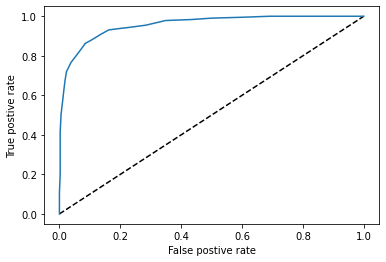

Auc Score :
 0.8862995075677472


In [76]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_pred_prob = Final_mod.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test,y_pred_prob)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label='Random Forest Classifier')
plt.xlabel('False postive rate')
plt.ylabel('True postive rate')
plt.show()
auc_score = roc_auc_score(Y_test, Final_mod.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

# Saving model

In [77]:
import joblib
joblib.dump(Final_mod,'IBM_HR_Analytics_Final.pkl')

['IBM_HR_Analytics_Final.pkl']